# Time Series Forecasting Model for Sensor Data

## Project Overview

This beginner-friendly project introduces you to the world of time series analysis, focusing on forecasting sensor data. Sensor data is crucial in various fields, including IoT, environmental monitoring, and manufacturing. Accurate predictions of future sensor readings enable proactive decision-making and system performance optimization.

In this project, we will explore time series analysis and its significance in uncovering patterns in temporal data. We'll cover different types of time series, such as continuous and discrete, and discuss key components of time series data, including trend, seasonality, and irregularity.

To ensure reliable analysis, we'll learn about stationarity and how to test it using the Augmented Dickey-Fuller (ADF) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests. Additionally, we'll use autocorrelation and partial autocorrelation functions (ACF and PACF) to identify data dependencies and correlations.

Building on this foundation, we'll develop and apply moving average (MA) and autoregressive (AR) models tailored for sensor data forecasting. These models will help us make accurate predictions and anticipate future readings based on historical patterns.

By the end of this project, you will have acquired valuable skills in analyzing sensor data using time series analysis techniques and forecasting future values. This knowledge will empower you to make informed decisions, optimize system performance, and harness the power of predictive analytics in the context of sensor data.

## Learning Outcomes

* Understand the importance of time series analysis for analyzing and forecasting data collected over time.
* Identify different types of time series data, including continuous and discrete.
* Recognize the components of a time series, such as trend, seasonality, and irregularity.
* Assess stationarity in time series data using statistical tests like ADF and KPSS.
* Interpret ACF and PACF plots to identify autoregressive and moving average patterns.
* Learn about the random walk model as a baseline for time series forecasting.
* Gain hands-on experience in preprocessing time series data, handling missing values, outliers, and inconsistencies.
* Develop Exploratory Data Analysis (EDA) skills to gain insights into data distribution, trends, and anomalies.
* Build moving average (MA) models for forecasting time series data.
* Develop autoregressive (AR) models of different orders for time series forecasting.
* Evaluate model performance using metrics like Root Mean Squared Error (RMSE).

---


In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# python version 3.8.10

!pip install matplotlib==3.3.4
!pip install pandas==1.2.4
!pip install statsmodels==0.12.2
!pip install seaborn==0.11.1
!pip install scipy==1.4.1
!pip install numpy==1.18.5
!pip install scikit-learn==1.2.2
!pip install projectpro

---

In [3]:
# Importing all required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from projectpro import preserve, model_snapshot, checkpoint
from pandas.plotting import autocorrelation_plot
import scipy.stats
import pylab

In [4]:
# Loading the data
data = pd.read_csv('../input/Data-Chillers.csv')
df = data.copy()

---

## **Exploratory Data Analysis**

In [5]:
# Checking first five rows of the data
df.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,29-08-2017 11:00,-0.015871,0.353986,-0.787655,0.008144
1,29-08-2017 12:00,-0.101576,0.353986,-0.787655,-0.029860
2,29-08-2017 13:00,-0.118241,0.353986,-0.787655,-0.021717
3,29-08-2017 14:00,-0.214262,0.353986,-0.787655,0.008144
4,29-08-2017 15:00,-0.249972,0.353986,-0.787655,-0.108583


In [6]:
df.shape

(1895, 5)

In [7]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1895 non-null   object 
 1   IOT_Sensor_Reading  1895 non-null   float64
 2   Error_Present       1895 non-null   float64
 3   Sensor_2            1895 non-null   float64
 4   Sensor_Value        1895 non-null   float64
dtypes: float64(4), object(1)
memory usage: 74.1+ KB


In [8]:
# Checking for missing values
df.isnull().sum()

time                  0
IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

In [9]:
# Converting the 'time' column to a timestamp format with a specific date and time format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y %H:%M')


In [10]:
# Finding the maximum date and time in the 'time' column
max_date_time = df['time'].max()

Timestamp('2017-11-17 00:00:00')

In [11]:
# Finding the minimum date and time in the 'time' column
min_date_time = df['time'].min()


Timestamp('2017-08-29 11:00:00')

- Dataset has 1 year worth of data from january 2017 to decemner 2017

In [12]:
# Checking the datatypes after converting datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                1895 non-null   datetime64[ns]
 1   IOT_Sensor_Reading  1895 non-null   float64       
 2   Error_Present       1895 non-null   float64       
 3   Sensor_2            1895 non-null   float64       
 4   Sensor_Value        1895 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 74.1 KB


In [13]:
# Calculate the correlation between different features
correlation_matrix = df.corr()


,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
IOT_Sensor_Reading,1.000000,-0.225237,0.192791,0.537485
Error_Present,-0.225237,1.000000,0.043020,-0.229122
Sensor_2,0.192791,0.043020,1.000000,0.240710
Sensor_Value,0.537485,-0.229122,0.240710,1.000000


- There are no significant relationship of target variable 'IOT_Sensor_Reading' with other variables 

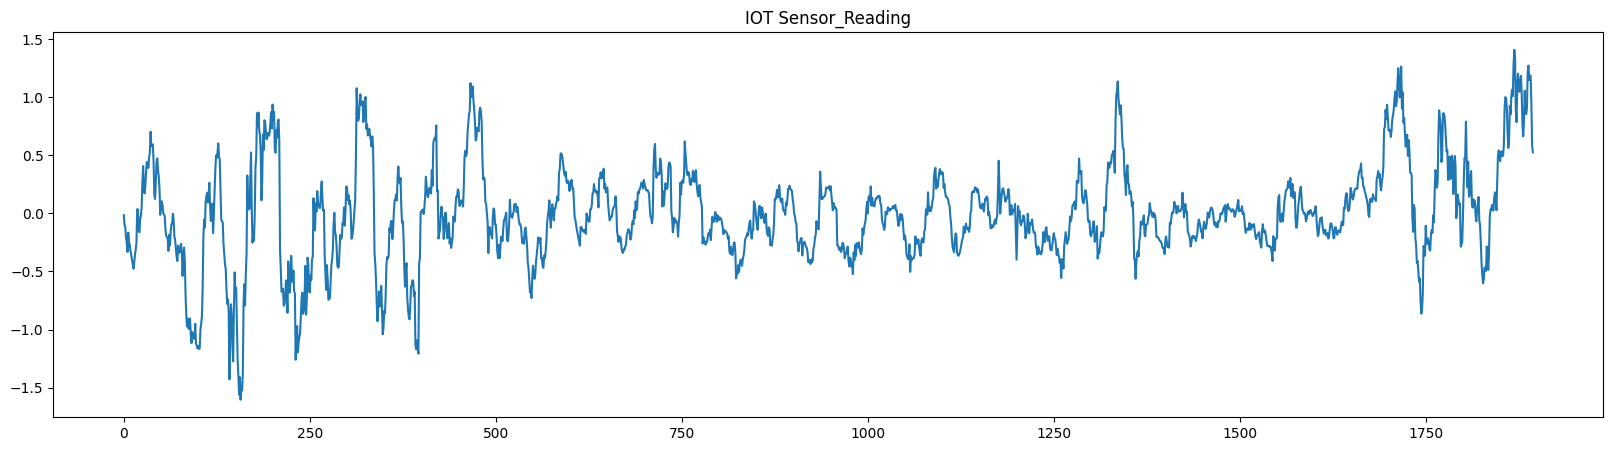

In [14]:
# Create a line plot of the 'IOT_Sensor_Reading' column
df['IOT_Sensor_Reading'].plot(figsize=(20, 5), title="IOT Sensor_Reading")

plt.show()


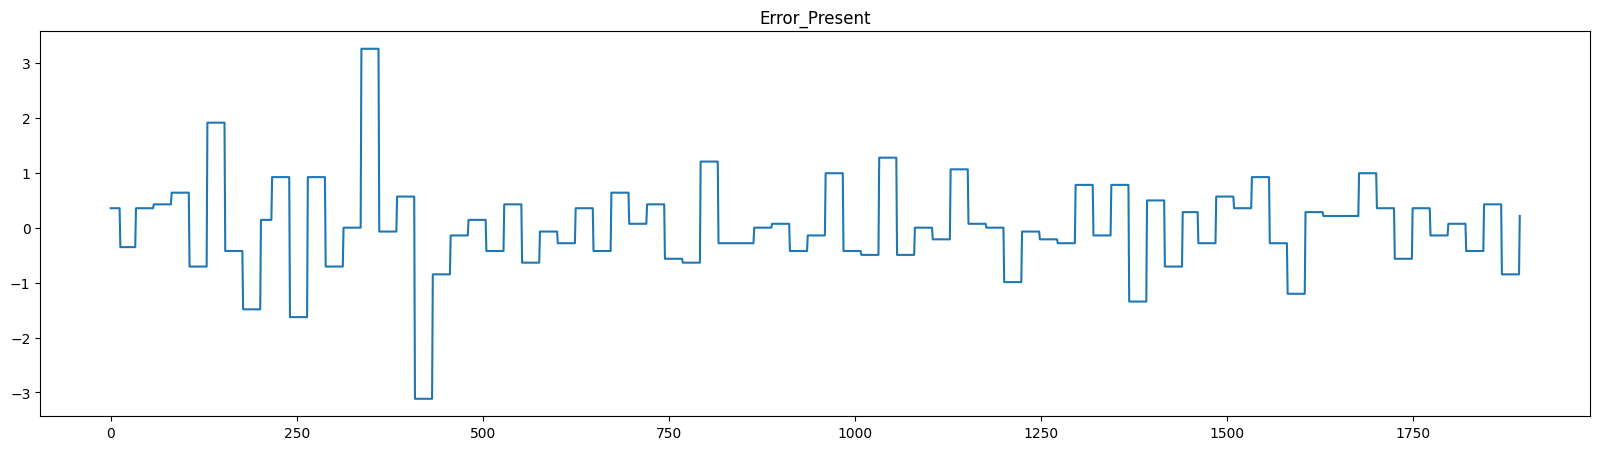

In [15]:
# Create a line plot of the 'Error_Present' column
df['Error_Present'].plot(figsize=(20, 5), title="Error_Present")

plt.show()


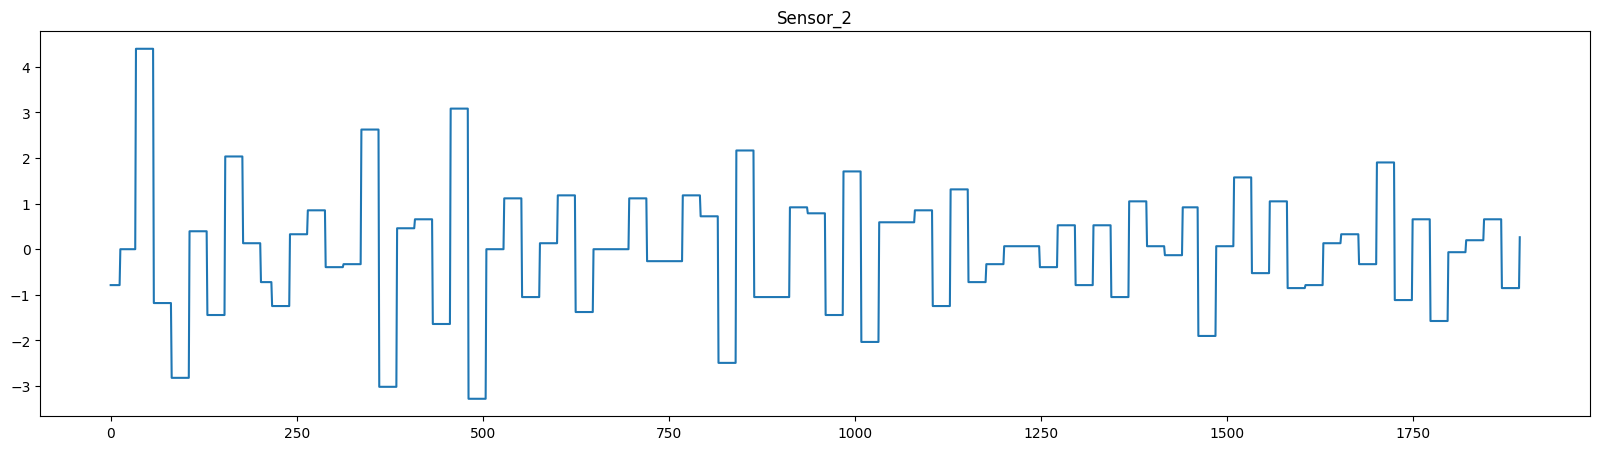

In [16]:
# Create a line plot of the 'Sensor_2' column
df['Sensor_2'].plot(figsize=(20, 5), title="Sensor_2")

plt.show()


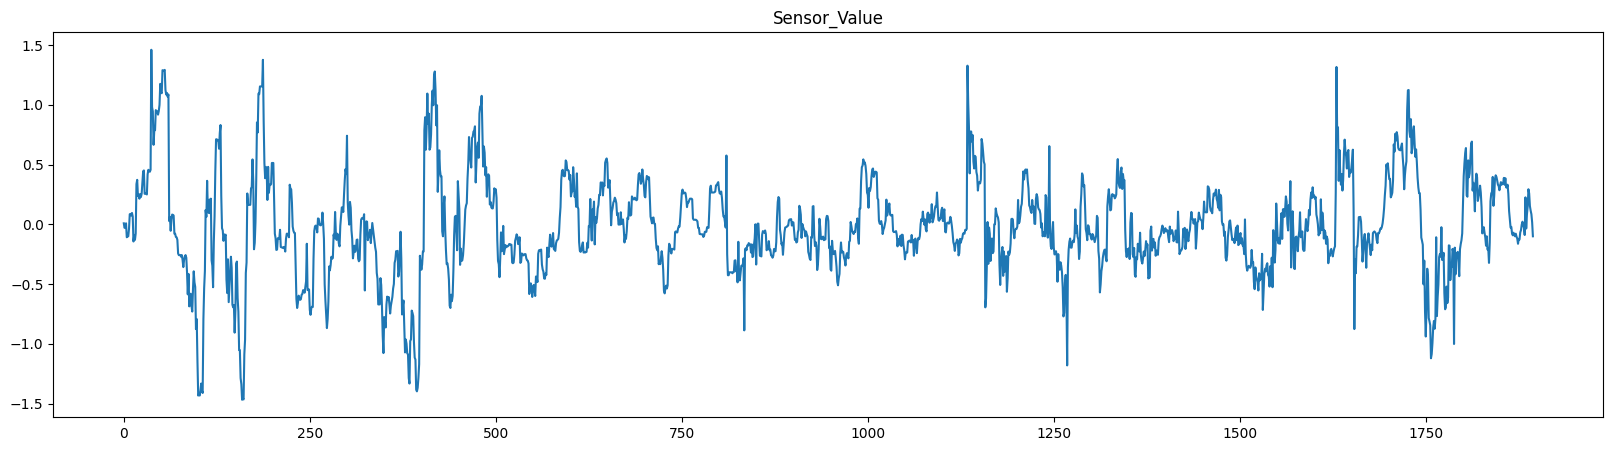

In [17]:
# Create a line plot of the 'Sensor_Value' column
df['Sensor_Value'].plot(figsize=(20, 5), title="Sensor_Value")

plt.show()


---

### **Q-Q Plot**

A Q-Q (Quantile-Quantile) plot is a helpful graphical tool for checking if a dataset conforms to a specific theoretical distribution. It achieves this by comparing the quantiles of the actual data with those of the theoretical distribution.

In the provided code, we use the Q-Q plot to assess the distribution of the "IOT_Sensor_Reading" variable in the "df" DataFrame. The scipy.stats.probplot function generates the Q-Q plot, taking the "IOT_Sensor_Reading" data as input. The "plot=pylab" parameter ensures the plot is displayed using the matplotlib.pyplot module.

The resulting plot showcases the quantiles of the observed data on the y-axis and the quantiles of the theoretical distribution on the x-axis. When the observed data closely adheres to the theoretical distribution, the points on the plot tend to align along a straight line. Any deviations from this straight line suggest deviations from the expected distribution.

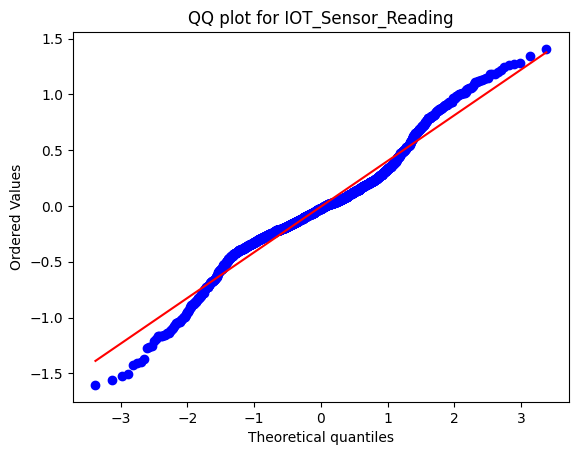

In [18]:
# Create a QQ plot for the 'IOT_Sensor_Reading' column
scipy.stats.probplot(df['IOT_Sensor_Reading'], plot=pylab)
plt.title("QQ plot for IOT_Sensor_Reading")

pylab.show()


In [19]:
df['IOT_Sensor_Reading'].mean()

-0.005884926703430078

In [20]:
df['IOT_Sensor_Reading'].min()

-1.603790141

In [21]:
df['IOT_Sensor_Reading'].max()

1.406986601

In [22]:
# Extract the hour of the day from the 'time' column
hour = df['time'].dt.hour

# Create a new column 'time_of_day' with labels for 'morning', 'noon', and 'evening'
df['time_of_day'] = pd.cut(hour, bins=[0, 11, 16, 23], labels=['morning', 'noon', 'evening'])

df.head()


,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value,time_of_day
0,2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144,morning
1,2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860,noon
2,2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717,noon
3,2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144,noon
4,2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583,noon


In [23]:
# Group the DataFrame by the 'time_of_day' column and calculate the maximum 'IOT_Sensor_Reading' for each group
max_IOT_Sensor_Reading = df.groupby('time_of_day')['IOT_Sensor_Reading'].max()

max_IOT_Sensor_Reading


time_of_day
morning    1.249068
noon       1.262558
evening    1.406987
Name: IOT_Sensor_Reading, dtype: float64

In [24]:
# Group the DataFrame by the 'time_of_day' column and calculate the minimum 'IOT_Sensor_Reading' for each group
min_IOT_Sensor_Reading = df.groupby('time_of_day')['IOT_Sensor_Reading'].min()

min_IOT_Sensor_Reading


time_of_day
morning   -1.603790
noon      -1.428413
evening   -1.273668
Name: IOT_Sensor_Reading, dtype: float64

In [25]:
# Group the DataFrame by the 'time_of_day' column and calculate the average 'IOT_Sensor_Reading' for each group
avg_IOT_Sensor_Reading = df.groupby('time_of_day')['IOT_Sensor_Reading'].mean()

avg_IOT_Sensor_Reading


time_of_day
morning   -0.009616
noon      -0.009113
evening    0.001481
Name: IOT_Sensor_Reading, dtype: float64

In [26]:
# Add a new column 'day_of_week' to the DataFrame and fill it with the day of the week based on the 'time' column
df['day_of_week'] = df['time'].dt.day_name()


In [27]:
# Group the DataFrame by the 'day_of_week' column and calculate the maximum 'IOT_Sensor_Reading' for each day of the week
max_IOT_Sensor_Reading = df.groupby('day_of_week')['IOT_Sensor_Reading'].max()

max_IOT_Sensor_Reading


day_of_week
Friday       0.628502
Monday       1.119717
Saturday     0.885616
Sunday       0.861809
Thursday     1.341914
Tuesday      1.134795
Wednesday    1.406987
Name: IOT_Sensor_Reading, dtype: float64

In [28]:
# Group the DataFrame by the 'day_of_week' column and calculate the minimum 'IOT_Sensor_Reading' for each day of the week
min_IOT_Sensor_Reading = df.groupby('day_of_week')['IOT_Sensor_Reading'].min()

min_IOT_Sensor_Reading


day_of_week
Friday      -1.260178
Monday      -1.428413
Saturday    -1.166537
Sunday      -0.743568
Thursday    -0.911803
Tuesday     -1.603790
Wednesday   -1.040361
Name: IOT_Sensor_Reading, dtype: float64

In [29]:
# Group the DataFrame by the 'day_of_week' column and calculate the average 'IOT_Sensor_Reading' for each day of the week
avg_IOT_Sensor_Reading = df.groupby('day_of_week')['IOT_Sensor_Reading'].mean()

avg_IOT_Sensor_Reading


day_of_week
Friday      -0.203002
Monday      -0.015544
Saturday    -0.075076
Sunday      -0.006987
Thursday     0.128790
Tuesday      0.024950
Wednesday    0.089639
Name: IOT_Sensor_Reading, dtype: float64

In [30]:
df.shape

(1895, 7)

In [31]:
# Sort the DataFrame by the 'time' column in ascending order
# df.sort_values('time', inplace=True)

# Set the 'time' column as the index of the DataFrame
df.set_index('time', inplace=True)


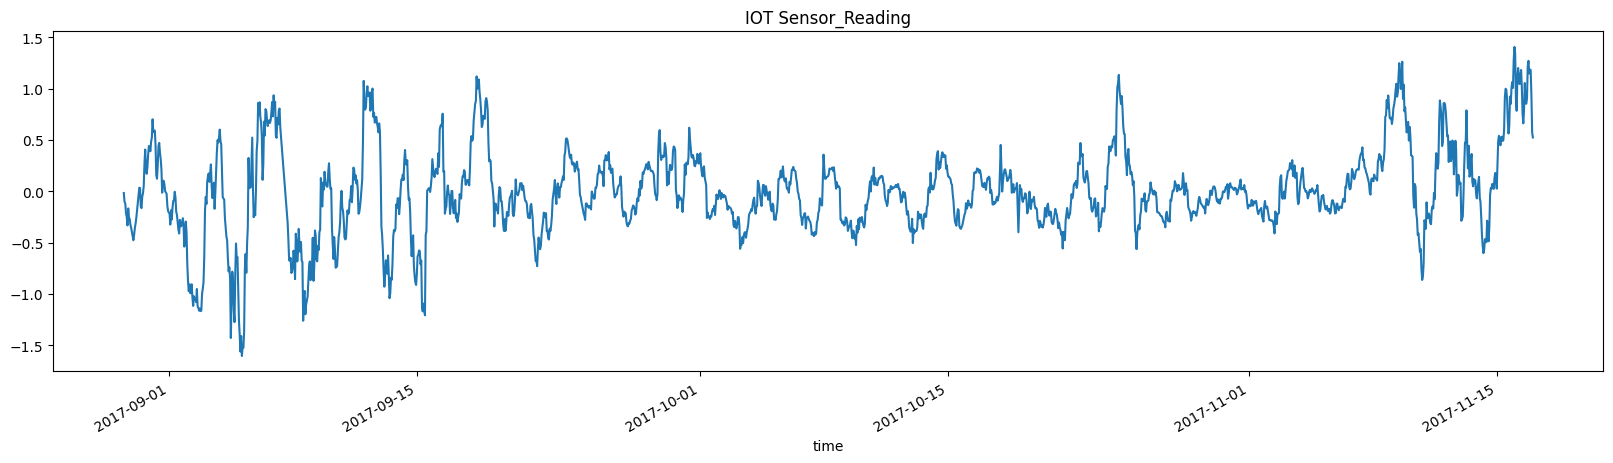

In [32]:
# Create a line plot of the 'IOT_Sensor_Reading' column with a specified figure size and title
df['IOT_Sensor_Reading'].plot(figsize=(20, 5), title="IOT Sensor_Reading")

plt.show()


In [33]:
# Resample the DataFrame to an hourly frequency and assign it to a new DataFrame
df.asfreq('H')


,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value,time_of_day,day_of_week
time,,,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144,morning,Tuesday
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860,noon,Tuesday
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717,noon,Tuesday
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144,noon,Tuesday
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583,noon,Tuesday
...,...,...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016,evening,Thursday
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012,evening,Thursday
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152,evening,Thursday


In [34]:
df = df.asfreq('H')

In [35]:
df.shape

(1910, 6)

---

## Handling Missing Values in a Time Series Data

Handling missing values in time series data is an important part of preparing your data for analysis. These gaps can occur for various reasons, such as sensor issues, data transmission problems, or human errors. Dealing with missing data is crucial for accurate time series analysis. In this section, we'll explore different methods for handling missing values in time series data.

1. **Deletion**: The simplest approach is to remove rows or time periods with missing values. However, use this cautiously, as it can result in a loss of valuable information, especially if missing values are frequent or systematic. Deletion is suitable when missing values are random and don't significantly impact the overall analysis.

2. **Forward Fill (LOCF)**: Here, missing values are filled with the most recent observed value. This method assumes that missing values change gradually and that the previous value is a reasonable substitute. Forward fill is ideal for time series data with slow changes, like slowly shifting trends or seasonality.

3. **Backward Fill (NOCB)**: Similar to forward fill, missing values are replaced with the next observed value. This method works well when the time series exhibits delays or lags, as seen in financial or economic data.

4. **Interpolation**: Interpolation methods estimate missing values based on neighboring data points. Common techniques include linear interpolation, cubic spline interpolation, and polynomial interpolation. These approaches provide smoother estimations by considering data trends and patterns. However, they assume continuous and smooth changes in the time series.

5. **Mean or Median Imputation**: Missing values are replaced with the mean (average) or median of available data. Mean imputation uses the average value, while median imputation employs the middle value. This method is simple but may not accurately capture data dynamics or variability. Use mean or median imputation cautiously, as it can affect statistical properties.

6. **Model-based Imputation**: This approach involves constructing a model using available data to predict missing values. It's a more advanced and accurate method compared to simple imputation. Techniques like regression models, ARIMA models, or machine learning algorithms can estimate missing values based on relationships with other variables or past observations. However, it requires careful consideration of model assumptions and selection.

In [36]:
# Fill missing values in 'IOT_Sensor_Reading' column with forward fill (ffill) method
df['IOT_Sensor_Reading'] = df['IOT_Sensor_Reading'].fillna(method="ffill")

# Fill missing values in 'Error_Present' column with backward fill (bfill) method
df['Error_Present'] = df['Error_Present'].fillna(method="bfill")

# Fill missing values in 'Sensor_2' column with backward fill (bfill) method
df['Sensor_2'] = df['Sensor_2'].fillna(method="bfill")

# Fill missing values in 'Sensor_Value' column with the mean of the column
df['Sensor_Value'] = df['Sensor_Value'].fillna(value=df['Sensor_Value'].mean())


---

## Components of Time Series: Trend, Seasonality, Cyclicity, and Noise

Time series data often displays distinct components that contribute to its overall behavior. Understanding these components is essential for accurate analysis and forecasting. In this section, we will explore the four main components of time series: trend, seasonality, cyclicity, and noise.

1. **Trend**: The trend component represents the long-term, persistent pattern in the time series. It indicates the overall direction in which the data is moving over an extended period. Trends can be upward (increasing), downward (decreasing), or horizontal (constant). Factors like economic changes, population growth, or technological advancements can drive trends. Identifying and analyzing trends provides valuable insights into underlying processes and supports informed predictions.

2. **Seasonality**: Seasonality involves a regular and predictable pattern that repeats within fixed time intervals. These patterns are often associated with calendar-related effects, like daily, weekly, monthly, or yearly variations. Seasonality is observable in various domains, such as sales (higher during holidays), weather (temperature fluctuations), or stock markets (periodic shifts). Seasonal patterns can be additive (consistent magnitude) or multiplicative (magnitude changes with the time series level). Accounting for seasonality is crucial for accurate forecasting and anomaly detection.

3. **Cyclicity**: Cyclicity refers to patterns in the time series occurring at irregular intervals, typically longer-term than seasonality. Unlike seasonality, cyclical patterns lack fixed and predictable lengths but exhibit repetitive fluctuations. Economic cycles, business cycles, and external factors can drive cyclical patterns. Their duration and amplitude can vary across different cycles. Identifying and analyzing cyclical patterns offers insights into long-term time series dynamics and broader trends.

4. **Noise (Irregularity or Residual)**: Noise comprises random and unpredictable fluctuations or irregularities in the time series that cannot be attributed to the trend, seasonality, or cyclicity. It represents unexplained or residual variation not accounted for by other components. Noise may result from measurement errors, random shocks, or other unpredictable factors. It is characterized by statistical properties like mean, variance, and autocorrelation. Analyzing noise is crucial to distinguish it from meaningful patterns and make reliable forecasts.

It's important to recognize that these components may vary in presence and characteristics across different time series data. Some time series may exhibit all four components, while others may have one or a combination of a few. Additionally, these components can interact, making analysis and modeling more complex. Effective time series analysis involves appropriately identifying and modeling these components to accurately capture underlying patterns and dynamics.

Decomposing a time series into these components allows analysts to gain insights into the factors influencing the data, identify patterns, and make more accurate predictions.

- We use the seasonal_decompose() function to decompose the time series into trend, seasonal, and residual components.

- The model parameter is set to 'additive', assuming that the components add up to form the observed time series. If your data exhibits multiplicative seasonality, you can change the model parameter to 'multiplicative'.

- After decomposing the time series, we extract the trend, seasonal, and residual components using the respective attributes of the decomposition object.

- Finally, we plot the original time series and the extracted components using matplotlib. The resulting plot will show the trend, seasonality, and residuals separately.

In [37]:
# Decompose the 'IOT_Sensor_Reading' time series into its components
# The 'additive' model assumes that the observed series is the sum of the trend, seasonal, and residual components.
# The 'period' parameter specifies the seasonal period, in this case, 365 for daily data.
decomp = seasonal_decompose(df['IOT_Sensor_Reading'], model='additive', period=365)

# Extract the trend component
trend = decomp.trend

# Extract the seasonal component
seasonal = decomp.seasonal

# Extract the residual (irregular) component
irregular = decomp.resid


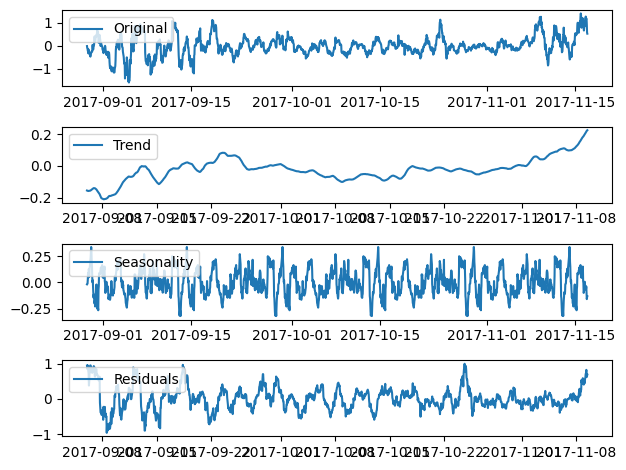

In [38]:
# Create subplots to visualize the components of the time series decomposition
plt.subplot(411)
plt.plot(df['IOT_Sensor_Reading'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(irregular, label='Residuals')
plt.legend(loc='upper left')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


<AxesSubplot:xlabel='time'>

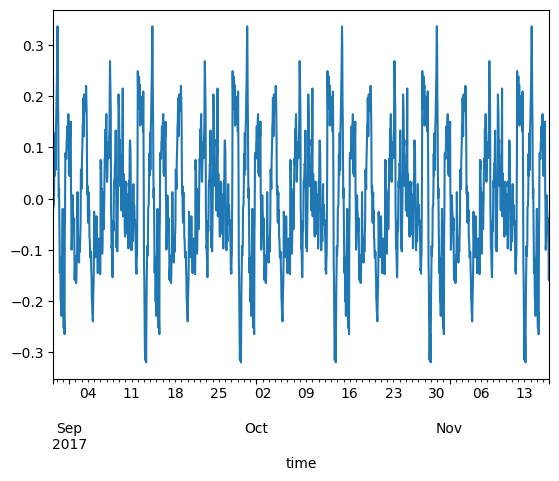

In [39]:
seasonal.plot()


<AxesSubplot:xlabel='time'>

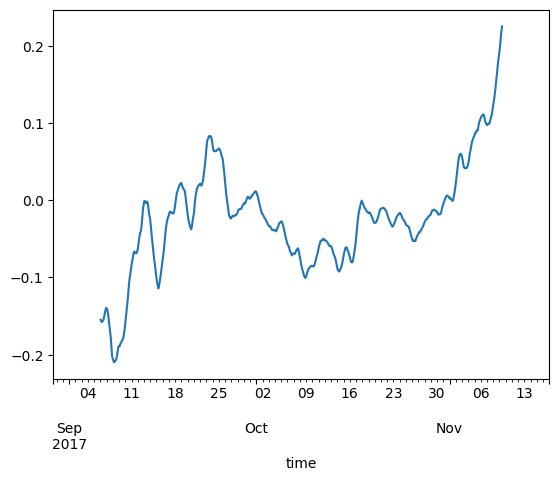

In [40]:
trend.plot()


<AxesSubplot:xlabel='time'>

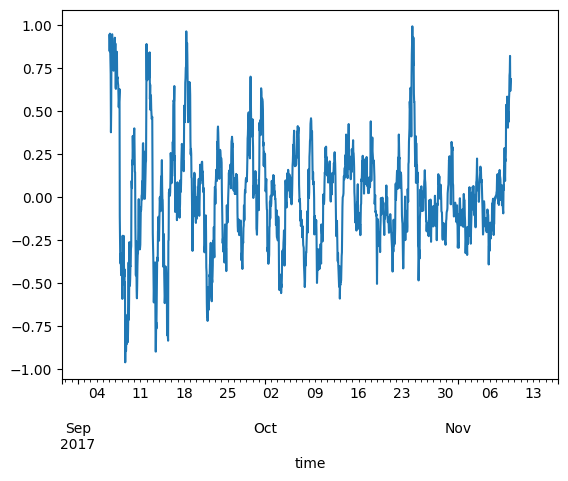

In [41]:
irregular.plot()

In [42]:
df = df[['IOT_Sensor_Reading']]
df

,IOT_Sensor_Reading
time,
2017-08-29 11:00:00,-0.015871
2017-08-29 12:00:00,-0.101576
2017-08-29 13:00:00,-0.118241
2017-08-29 14:00:00,-0.214262
2017-08-29 15:00:00,-0.249972
...,...
2017-11-16 20:00:00,1.186376
2017-11-16 21:00:00,1.182408
2017-11-16 22:00:00,0.934023


---

## Stationarity and Its Significance for Forecasting

In the realm of time series analysis, stationarity stands as a vital concept, bearing a pivotal role in comprehending and predicting data. A stationary time series maintains consistent statistical properties, such as mean, variance, and autocorrelation, across time. Conversely, a non-stationary time series displays fluctuating statistical characteristics, rendering it intricate to model and forecast accurately.

**Importance of Stationarity in Forecasting:**

* **Consistency of Statistical Properties**: Stationary time series retain unchanging statistical properties, like a constant mean and variance. This attribute facilitates dependable assumptions about data behavior and the construction of models that remain valid throughout. Conversely, non-stationary time series often exhibit changing statistical properties, potentially leading to misguided conclusions and unreliable forecasts.

* **Simplifies Modeling**: Stationarity simplifies modeling by reducing the intricacies and uncertainties associated with non-stationary data. In a stationary time series, the connection between past and future observations remains relatively stable, permitting the application of conventional statistical and mathematical techniques for forecasting. Modeling non-stationary data requires additional steps, such as differencing or transformation, to render the series stationary before employing forecasting methods.

* **Assumptions of Forecasting Models**: Numerous forecasting models, like the autoregressive integrated moving average (ARIMA) model, presuppose stationarity. These models rest upon the notion that a time series's future behavior can be predicted based on its past behavior. Stationarity ensures that the underlying patterns and dynamics captured by these models remain consistent over time, enhancing the reliability of forecasts.

* **Accurate Parameter Estimation**: Stationarity facilitates the precise estimation of model parameters. In a stationary series, statistical properties remain unaltered over time, allowing for parameter estimation based on the entire dataset without the risk of biased or inconsistent estimates. Non-stationary series often necessitate estimation techniques that account for the changing nature of the data, such as time-varying models or structural break analysis.

* **Enhanced Forecasting Performance**: Forecasting models constructed upon stationary time series typically outperform those built upon non-stationary data. Stationarity provides a sturdy foundation for modeling and capturing underlying patterns, trends, and relationships within the data. This stability bolsters the accuracy and dependability of forecasts, facilitating improved decision-making and planning.

**Testing for Stationarity:**

To assess stationarity, statistical tests like the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test can be employed. These tests scrutinize the presence of unit roots or trends in the data, offering insights into the stationarity of the series. A stationary series yields a p-value below a specific threshold in these tests, signifying the rejection of the null hypothesis of non-stationarity.

If a time series is identified as non-stationary, it can be made stationary through techniques like differencing, logarithmic transformation, or seasonal adjustment. These transformations aim to eliminate trends, seasonality, or other non-stationary elements, rendering the series suitable for forecasting with stationary models.

## **Augmented Dickey Fuller Test**

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine if a time series is stationary or not. It is an extension of the Dickey-Fuller test and is widely used in time series analysis and forecasting.

The ADF test is based on the concept of unit roots, which indicate non-stationarity in a time series. Non-stationarity refers to the situation where the statistical properties of a time series, such as the mean and variance, are not constant over time. This makes it difficult to analyze and model the data accurately.

n time series analysis, a unit root is a characteristic of a time series that makes it non-stationary. A unit root implies that the time series has a root at exactly 1. Technically, a unit root exists in a time series when the coefficient of the lagged dependent variable is equal to 1 in the following equation:

Y(t) = α * Y(t-1) + Xe

In this equation, Y(t) represents the value of the time series at time 't', Y(t-1) represents the lagged value of the time series at time 't-1', α represents the coefficient of the lagged variable, and Xe represents an exogenous variable (a separate explanatory variable that is also a time series).

The presence of a unit root indicates non-stationarity in the time series. Non-stationarity means that the statistical properties of the time series, such as the mean and variance, are not constant over time. Instead, they exhibit trends or other patterns that make it difficult to analyze and model the data accurately.

When a time series has a unit root, it implies that the series has not reached a stable, equilibrium state and may exhibit persistent patterns or trends. As a result, the series may display random walks or exhibit behavior that is difficult to predict or forecast accurately.

The presence of unit roots in a time series affects the interpretation and modeling of the data. In order to apply many statistical techniques, including autoregressive integrated moving average (ARIMA) models, it is essential to transform the non-stationary series into a stationary one. This transformation often involves differencing the series to eliminate the unit root and make the series stationary.

Differencing is a common technique used to remove unit roots and make a time series stationary. By differencing, we compute the differences between consecutive observations in the series, effectively eliminating the trends and non-stationarity caused by the unit root. The differenced series can then be analyzed and modeled using various time series techniques.

The null hypothesis of the ADF test is that the time series has a unit root, which implies non-stationarity. The alternate hypothesis is that the time series is stationary. The test statistic is computed, and based on its value and the associated p-value, a decision is made whether to reject the null hypothesis or not.

The ADF test involves estimating the following regression equation:

ΔY(t) = α + βt + γY(t-1) + δ₁ΔY(t-1) + δ₂ΔY(t-2) + ... + δₙΔY(t-n) + ε(t)

In this equation, ΔY(t) represents the differenced series at time 't', Y(t-1) represents the lagged value of the series, α represents the intercept term, β represents the coefficient of time trend, γ represents the coefficient of the lagged variable, δ₁, δ₂, ..., δₙ represent the coefficients of the differenced series, and ε(t) represents the error term.

Since the null hypothesis assumes the presence of unit root, that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.

---



### **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**

The KPSS test is a statistical test that checks whether a time series is stationary. Unlike the Augmented Dickey-Fuller (ADF) test, which looks for unit roots, the KPSS test examines whether the time series is stationary or has a unit root (non-stationary).

The test uses this equation:

Y(t) = μ + ε(t) + Σₖ(γₖ * tₖ) + Σₘ(δₘ * Zₘ) + ν(t)

Here's what it means:
- Y(t) is the observed time series at time 't'.
- μ is the intercept.
- ε(t) is the error term.
- tₖ is the time trend.
- γₖ is the coefficient of the time trend.
- Zₘ is exogenous variables.
- δₘ is the coefficient of exogenous variables.
- ν(t) is the stochastic part.

The KPSS test estimates this equation and calculates a test statistic based on the squared residuals. This test statistic is compared to critical values to decide if the time series is stationary or not.

In the KPSS test:
- Null hypothesis: The time series is stationary.
- Alternative hypothesis: The time series has a unit root or is non-stationary.
- To reject the null hypothesis, the test statistic must be greater than critical values.
- If the p-value is less than 0.05, the KPSS statistic is greater than the 5% critical value.

The number of lags reported tells you how many lags the model used in the KPSS test.

The main difference between KPSS and ADF tests is that ADF is for finding unit roots, suggesting non-stationarity with a stochastic trend. KPSS looks for stationarity in the presence of a deterministic trend, where the trend doesn't change permanently, even after shocks. KPSS provides a more comprehensive analysis of time series stationarity by considering deterministic trends.

---




### **Stationary Check using ADF and KPSS**

To assess stationarity, we follow these steps:

1. Visual Inspection: We begin by plotting the original time series using `plt.plot()`. This helps us visually inspect the data to determine if it looks stationary or non-stationary.

2. ADF Test: To formally test for stationarity, we utilize the `adfuller()` function from the statsmodels library. We feed in the 'value' column of the DataFrame. The function returns an Augmented Dickey-Fuller test result, including:
   - ADF Statistic
   - P-value
   - Critical values for different significance levels.

3. P-Value Check: Based on the p-value from the ADF test, we make a determination:
   - If the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that the time series is stationary.
   - If the p-value exceeds the significance level, we fail to reject the null hypothesis and determine that the time series is non-stationary.

4. Differencing: If the original time series is non-stationary, we can difference the data using the `diff()` function. After differencing, we perform the ADF test again on the differenced time series to check for stationarity.

5. Visualize Differenced Time Series: Finally, we plot the differenced time series using `plt.plot()` to observe the changes made by differencing and ensure stationarity.

This process helps us determine whether differencing is needed to make the time series stationary for further analysis.

---



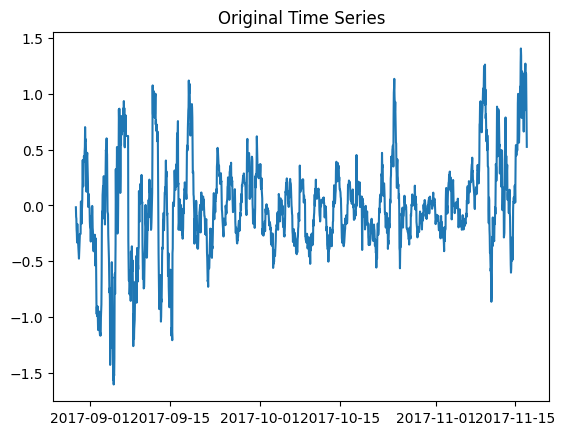

ADF Statistic:  -6.110712566123994
p-value:  9.347651207123362e-08
Critical Values: 
1% :  -3.433825707083533
5% :  -2.8630753283581076
10% :  -2.567587351898432


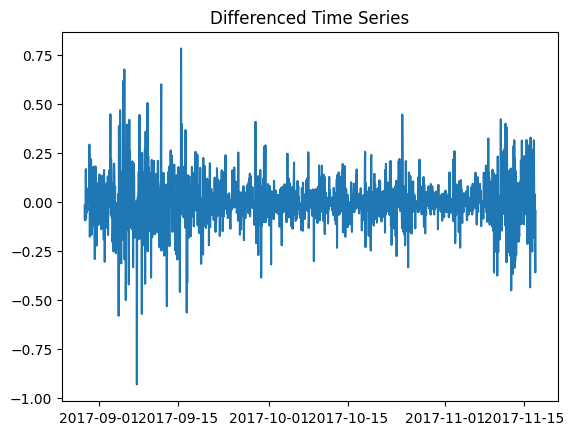

ADF Statistic:  -13.95177317162291
p-value:  4.687970518890155e-26
Critical Values: 
1% :  -3.4338238606869878
5% :  -2.863074513221476
10% :  -2.5675869178703854


In [43]:
# Plot the original time series
plt.plot(df['IOT_Sensor_Reading'])
plt.title('Original Time Series')
plt.show()

# Checkpoint for tracking
checkpoint('c2bf09')

# Test for stationarity using Augmented Dickey-Fuller (ADF) test
result = adfuller(df['IOT_Sensor_Reading'])
print('ADF Statistic: ', result[0])  # ADF test statistic
print('p-value: ', result[1])         # p-value
print('Critical Values: ')
for key, value in result[4].items():
    print(key, ": ", value)

# Difference the time series and plot
diff_data = df.diff().dropna()
plt.plot(diff_data)
plt.title('Differenced Time Series')
plt.show()

# Test for stationarity of the differenced time series using ADF test
result = adfuller(diff_data['IOT_Sensor_Reading'])
print('ADF Statistic: ', result[0])  # ADF test statistic
print('p-value: ', result[1])         # p-value
print('Critical Values: ')
for key, value in result[4].items():
    print(key, ": ", value)


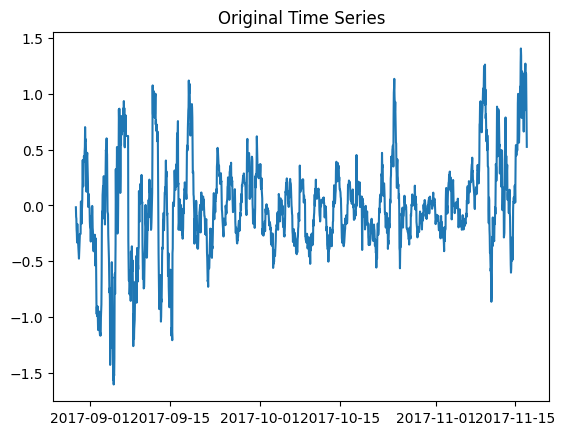

KPSS Statistic: 0.7047053229482739
p-value: 0.013117697913793278
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


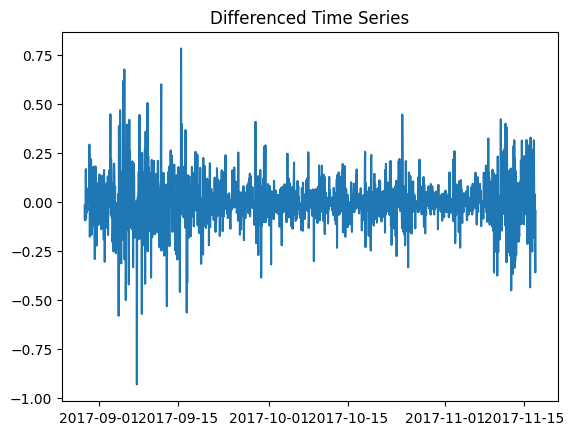

KPSS Statistic: 0.7047053229482739
p-value: 0.013117697913793278
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


In [44]:
# Plot the original time series
plt.plot(df['IOT_Sensor_Reading'])
plt.title('Original Time Series')
plt.show()

# Perform the KPSS test
result = kpss(df['IOT_Sensor_Reading'])

# Extract and print the results of the KPSS test
kpss_statistic = result[0]  # KPSS test statistic
p_value = result[1]        # p-value
critical_values = result[3]  # Critical values

print('KPSS Statistic:', kpss_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

# Difference the time series and plot
diff_data = df.diff().dropna()
plt.plot(diff_data)
plt.title('Differenced Time Series')
plt.show()

# Test for stationarity of the differenced time series using KPSS test
result = kpss(df['IOT_Sensor_Reading'])

# Extract and print the results of the KPSS test on the differenced time series
kpss_statistic = result[0]  # KPSS test statistic
p_value = result[1]        # p-value
critical_values = result[3]  # Critical values

print('KPSS Statistic:', kpss_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')


---

## **ACF and PACF Plots**

ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are visual tools used in time series analysis to understand the relationships between data points in a time series.

### **Autocorrelation Function (ACF) Plot:**

The ACF plot shows how each data point is related to its previous values. It measures the strength and direction of this relationship by displaying correlation coefficients. On the plot, the y-axis represents correlation, and the x-axis represents time lags (how many steps back you're looking).
Interpreting the ACF plot:

- If there's a significant positive correlation at lag 1 (the first step back), it means the current data point is positively related to the one just before it.
- A significant negative correlation at lag 1 indicates a negative relationship between the current data point and the previous one.
- Significant correlations at different lags might suggest patterns or trends in the time series.

### **Partial Autocorrelation Function (PACF) Plot:**

The PACF plot also looks at relationships between data points but focuses on direct connections while ignoring the impact of intervening observations.
Interpreting the PACF plot:

- It helps identify the order of an autoregressive (AR) model, where past data points predict the current one.
- A significant spike at lag 1 with no spikes at other lags suggests an AR(1) model, where the current data point depends only on the immediate previous one.
- Significant spikes at various lags suggest an AR model with multiple steps in between.

Both ACF and PACF plots are useful for deciding how many past data points are needed in time series models. They help us understand the patterns in the data and select the right models for forecasting.

To create an ACF plot, we use the `plot_acf()` function from the statsmodels library. We provide the time series data and specify how many lags to consider.

Similarly, for a PACF plot, we use the `plot_pacf()` function from the same library with the time series data and the number of lags to consider. These plots help us visualize the relationships in the data and choose the best models for analysis.

---

<Figure size 1200x400 with 0 Axes>

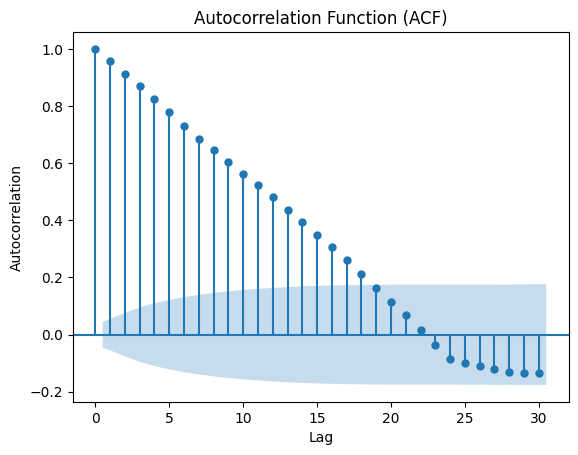

<Figure size 1200x400 with 0 Axes>

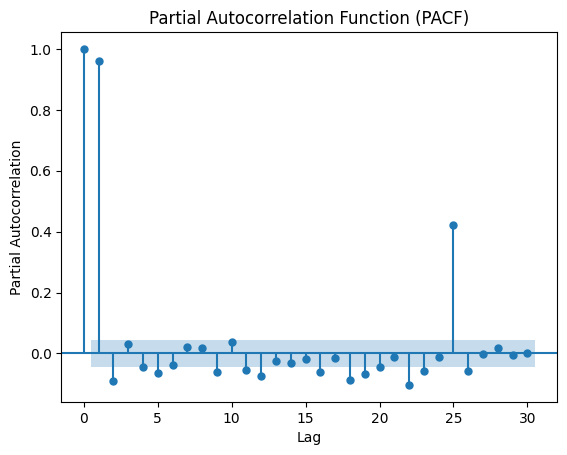

In [45]:
# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(12, 4))
plot_acf(df['IOT_Sensor_Reading'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 4))
plot_pacf(df['IOT_Sensor_Reading'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


---

# Autocovariance Matrix

In [46]:
df

,IOT_Sensor_Reading
time,
2017-08-29 11:00:00,-0.015871
2017-08-29 12:00:00,-0.101576
2017-08-29 13:00:00,-0.118241
2017-08-29 14:00:00,-0.214262
2017-08-29 15:00:00,-0.249972
...,...
2017-11-16 20:00:00,1.186376
2017-11-16 21:00:00,1.182408
2017-11-16 22:00:00,0.934023


In [47]:
# Calculate the autocovariance matrix
autocov_matrix = np.cov(df, rowvar=False)

# Print the autocovariance matrix
print("Autocovariance Matrix:")
print(autocov_matrix)


Autocovariance Matrix:
0.1732515263424908


---

## **White Noise**

White noise is a fundamental concept in time series analysis, and it's pretty straightforward.

**Characteristics of White Noise:**

1. **Constant Mean:** The average value of white noise stays the same over time. It's often assumed to be zero, but it could be any fixed number.

2. **Constant Variance:** The spread or variability of white noise remains consistent throughout time. This means the random values don't become more or less spread out.

3. **No Autocorrelation:** In white noise, there's no connection between the current value and past or future values. Each point is entirely on its own and doesn't depend on the others.

4. **Normally Distributed:** We often think of white noise as following a normal bell curve, though it doesn't have to be exactly that. What's essential is that the random values aren't related to each other, and they have a constant mean and variance.

**Why White Noise Matters:**

White noise plays several roles in time series analysis:

- **Model Testing:** We use white noise as a sort of blank canvas to test how well more complex models fit our data. By comparing a model's residuals to white noise, we can see if the model captures all the important patterns.

- **Creating Simulated Data:** White noise is the starting point for making artificial data that mimics real data characteristics. By adding patterns or structures to white noise, we can create more realistic and complex data for testing and analysis.

- **Parameter Estimation:** When estimating parameters (like in autoregressive or moving average models), white noise assumptions make the math easier. They allow us to use efficient techniques like least squares or maximum likelihood estimation.

---



- We use np.random.normal() to generate white noise. The loc parameter specifies the mean of the distribution (0 in this case), the scale parameter specifies the standard deviation (1 in this case), and the size parameter specifies the number of samples to generate (num_samples in this case).

- By default, np.random.normal() generates samples from a standard normal distribution (mean=0, standard deviation=1), which represents white noise. If you want to change the mean or standard deviation, you can adjust the loc and scale parameters accordingly.

- The resulting white_noise array contains the generated white noise samples.

- Finally, we plot the white noise using plt.plot() to visualize the amplitude of the noise over time. The resulting plot shows random fluctuations with no apparent pattern, characteristic of white noise.


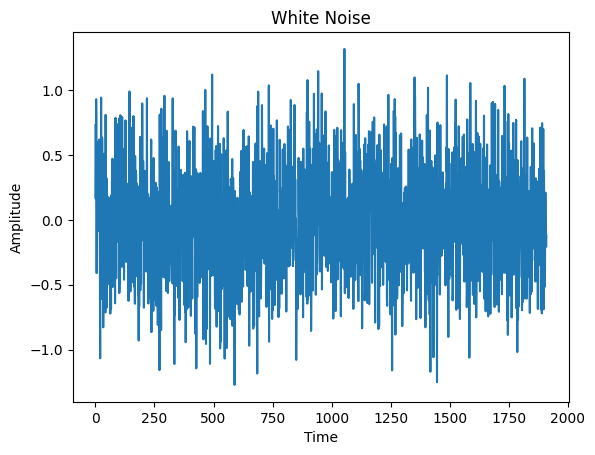

In [48]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate white noise
num_samples = 1000
white_noise = np.random.normal(loc=df.IOT_Sensor_Reading.mean(), scale=df.IOT_Sensor_Reading.std(), size=len(df))

# Add white noise as a new column in the DataFrame
df["white_noise"] = white_noise

# Display statistics of the DataFrame
df.describe()

# Plot the white noise
plt.plot(white_noise)
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


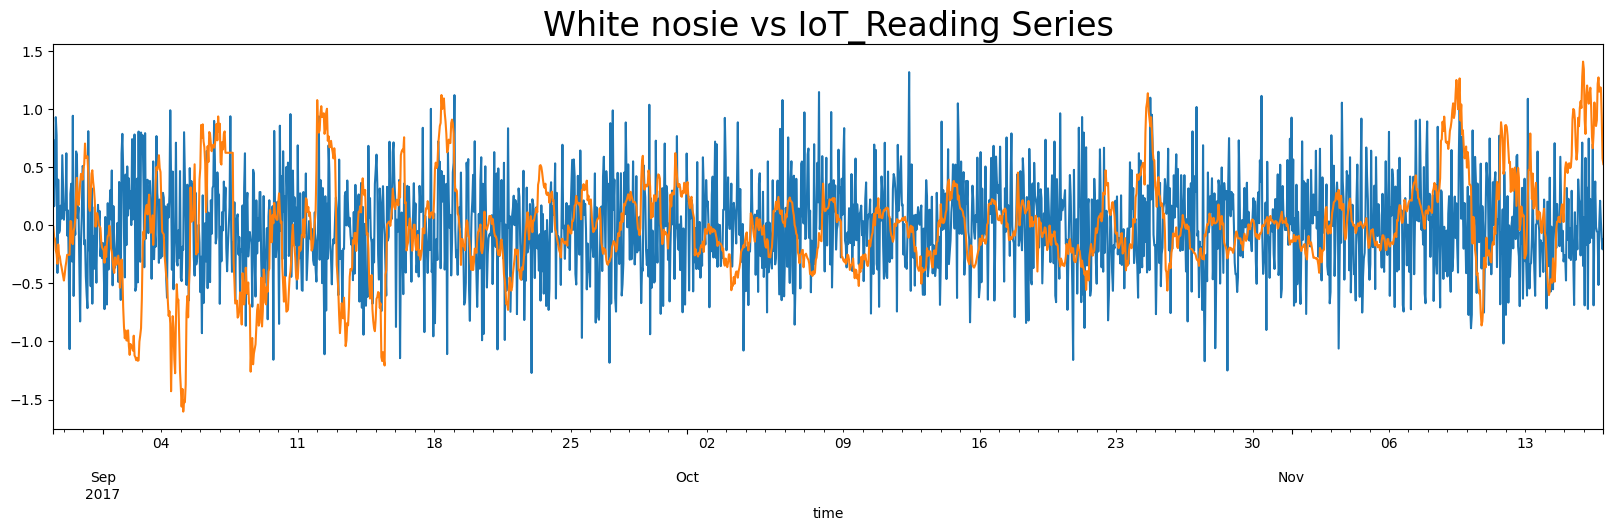

In [49]:
# Plot the 'white_noise' and 'IOT_Sensor_Reading' series
df.white_noise.plot(figsize=(20, 5), label='White Noise')
df.IOT_Sensor_Reading.plot(figsize=(20, 5), label='IOT Sensor Reading')
plt.title("White Noise vs IoT Reading Series", size=24)

# Display the plot
plt.show()


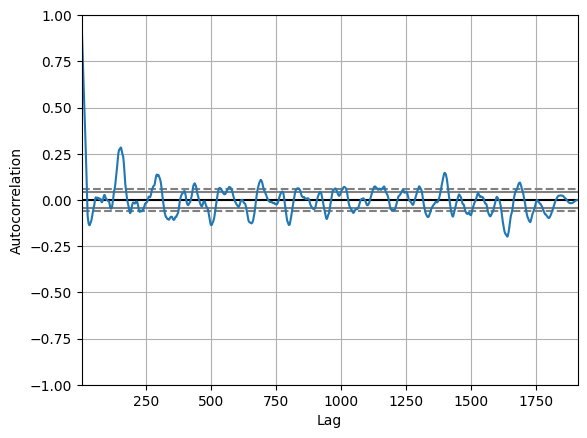

In [50]:
# Create an autocorrelation plot for the 'IOT_Sensor_Reading' time series
autocorrelation_plot(df.IOT_Sensor_Reading)

plt.show()


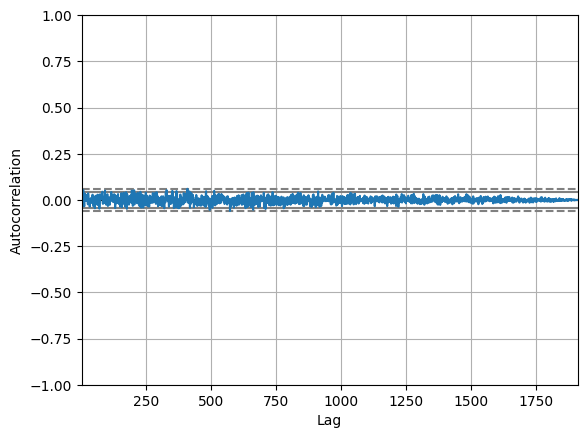

In [51]:
# Create an autocorrelation plot for the 'white_noise' time series
autocorrelation_plot(df.white_noise)

plt.show()


In [52]:
del df['white_noise']

---

### **Random Walk**

A random walk is a math model describing a path where each step is randomly determined. This concept is essential in fields like finance, economics, and physics, as it helps analyze and predict time series data.

**Characteristics of a Random Walk:**

1. **Random Steps:** In a random walk, each step is random. At each time point, the variable can move up or down with equal chance. Think of it like a coin toss or random number generator deciding the direction and size of each step.

2. **Cumulative Sum:** The variable's value at any time is the sum of all the previous random steps. The current value depends on previous values and the order of random steps taken.

3. **Drift:** A random walk can include a drift component, representing a systematic trend. With a drift, the average movement will be non-zero. Without it, the average movement will be zero.

**Properties of a Random Walk:**

- **Trendless:** A random walk without a drift doesn't have a trend. The variable moves randomly around a fixed average without a consistent upward or downward trend. No drift means the expected value remains constant over time.

- **Non-Stationary:** A random walk is generally non-stationary. Stationarity means that the statistical properties like the mean and variance don't change over time. In a random walk, the mean and variance increase over time, indicating non-stationarity.

**Applications of Random Walks:**

- **Financial Markets:** Random walks are used to model stock prices. The efficient market hypothesis suggests stock prices follow a random walk with a drift component. This implies it's tough to consistently beat the market based on past price patterns.

- **Econometrics:** Random walks are a benchmark model in econometrics. They help test for unit roots, indicating non-stationarity, and analyze long-term relationships between variables.

- **Monte Carlo Simulations:** Random walks are useful in Monte Carlo simulations for generating random sequences with specific statistical properties. These simulations model and study complex systems in various fields.

---

- We first set the random seed using np.random.seed() to ensure reproducibility of the results.

- Next, we define the parameters for the random walk. num_steps specifies the number of steps to take, and initial_value represents the starting point of the random walk.

- We generate random steps using np.random.choice() by choosing -1 or 1 with equal probability (size=num_steps). These steps represent the random increments or decrements taken at each step of the walk.

- To simulate the random walk, we accumulate the steps using np.cumsum() to calculate the cumulative sum of the steps and add the initial value.

- Finally, we plot the random walk using plt.plot() to visualize the value of the random walk over time. The resulting plot shows the random fluctuations as the random walk moves up or down.


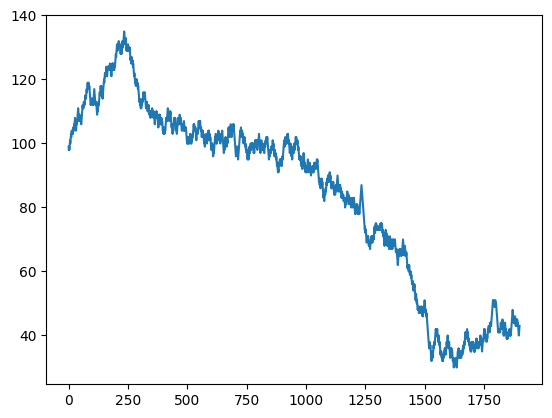

In [53]:
# Set random seed for reproducibility

# Initialize the walk with the starting value 99
walk = [99]

# Generate the random walk
for i in range(1900):
    # Create random noise: -1 or 1 with equal probability
    noise = -1 if np.random.random() < 0.5 else 1
    # Update the walk value by adding the noise
    walk.append(walk[-1] + noise)

# Plot the random walk
plt.plot(walk)


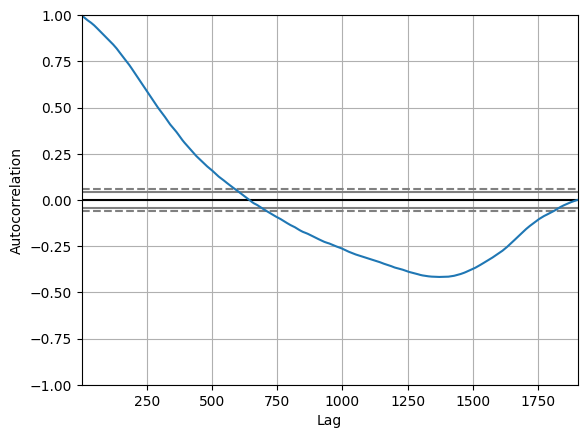

In [54]:
# Create an autocorrelation plot for the 'walk' time series (random walk)
autocorrelation_plot(walk)

plt.show()


---

## **Moving Average Model (MA)**

The MA model is a handy tool for forecasting and analyzing time-dependent data. It's part of a larger group called autoregressive moving average (ARMA) models. The MA model describes the connection between a time series' observed values and the past forecast errors.

**Mathematically, it's represented as MA(q):**

X(t) = μ + ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θqε(t-q)

- X(t) is the time series value at time t.
- μ is the series' average.
- ε(t) is a random error at time t.
- θ₁, θ₂, ..., θq are model parameters that describe the impact of past forecast errors.
- q signifies the MA model's order, specifying how many past errors are involved.

**Key Points about the MA Model:**

- **Mean:** μ is the series' long-term average.
- **Error Terms:** ε(t), ε(t-1), ..., ε(t-q) are independent errors with an average of zero and constant variance.
- **Parameters:** θ₁, θ₂, ..., θq determine how past errors influence the current value.
- **Order:** q tells us how many past errors to consider.
- **Stationarity:** If |θ₁|, |θ₂|, ..., |θq| are all less than 1, the MA model is stationary, meaning the mean and variance stay constant over time.
- **Forecasting:** The MA model predicts future values using past observations and past forecast errors.
- **Identification:** We figure out the right order (q) for the MA model by studying autocorrelation and partial autocorrelation plots of the time series.

---



- we use the ARIMA class from statsmodels.tsa.arima.model to create the MA model. The order parameter is set to (0, 0, 1), where p=0 represents the autoregressive order, d=0 represents the differencing order, and q=1 represents the moving average order. By setting p=0 and d=0, we effectively remove the autoregressive and differencing components, leaving only the moving average component.

- The rest of the code remains the same as in the previous example. We fit the model to the data, obtain the fitted values, plot the original data and the fitted values, and print the model summary.

- Keep in mind that even though we are using the ARIMA framework, specifying an (0, 0, 1) order effectively models a Moving Average (MA) process.

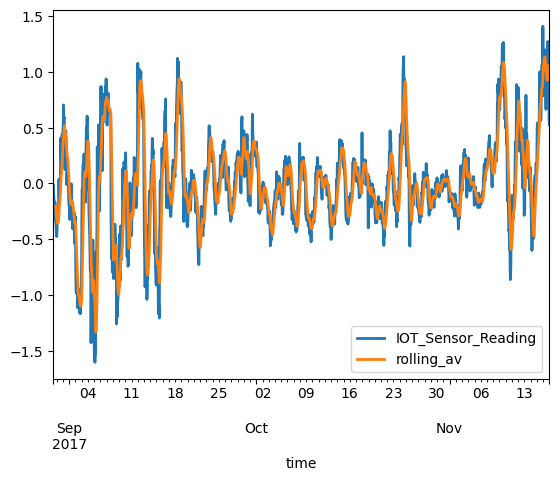

In [55]:
# Calculate a rolling average with a window size of 10
df['rolling_av'] = df['IOT_Sensor_Reading'].rolling(10).mean()

# Plot both the original 'IOT_Sensor_Reading' and the rolling average
df[['IOT_Sensor_Reading', 'rolling_av']].plot(lw=2)


RMSE: 0.24699001224659006


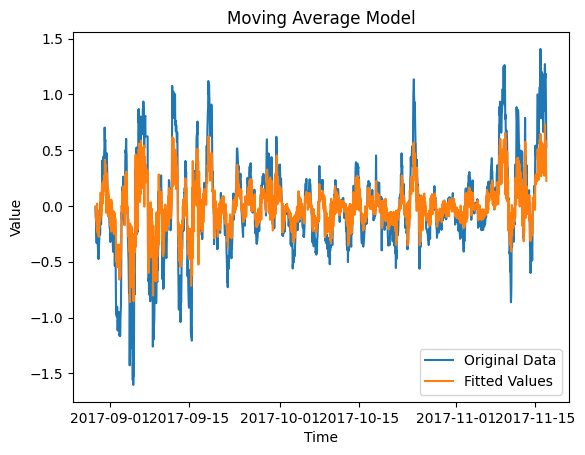

                               SARIMAX Results                                
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -39.748
Date:                Tue, 04 Jul 2023   AIC                             85.496
Time:                        09:16:42   BIC                            102.160
Sample:                    08-29-2017   HQIC                            91.629
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.010     -0.316      0.752      -0.024       0.017
ma.L1          0.8470      0.010     82.228      0.000       0.827       0.867
sigma2         0.0610      0.001     40.855      0.0

In [56]:
# Define the order of the MA model
order = (0, 0, 1)  # (p, d, q) order of the model

# Create the ARIMA model with the specified order
model = ARIMA(df['IOT_Sensor_Reading'], order=order)

# Fit the model to the data
model_fit = model.fit()

# Get the fitted values from the model
fitted_values = model_fit.fittedvalues

# Calculate the Root Mean Squared Error (RMSE) between the original data and fitted values
rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'], fitted_values))
print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title('Moving Average Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print the model summary
print(model_fit.summary())


---

### **Errors in Regression**

In regression analysis, we strive to create a model that best fits the data, but there will always be some degree of error. Let's explore various error metrics commonly used in regression analysis:

1. **Mean Absolute Error (MAE):**
   - MAE is a simple and intuitive error metric.
   - It calculates the absolute difference between each data point's actual value and the predicted value and then computes the average of these absolute differences.
   - MAE measures the typical magnitude of the residuals.
   - Formula:
     $$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$

2. **Mean Square Error (MSE):**
   - MSE is similar to MAE but squares the differences before averaging them.
   - This squaring emphasizes larger errors and is suitable for identifying the impact of outliers.
   - MSE is generally greater than MAE due to the squaring.
   - Formula:
     $$MSE = \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$

3. **Root Mean Squared Error (RMSE):**
   - RMSE is the square root of MSE.
   - It is used to bring the error metric back into the original units for easier interpretation.
   - Like MSE, RMSE also emphasizes larger errors.
   - Formula:
     $$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2}$$

4. **Mean Absolute Percentage Error (MAPE):**
   - MAPE calculates the average percentage difference between the model's predictions and the actual values.
   - It is expressed as a percentage, making it easier to understand.
   - MAPE, like MAE, is robust against outliers.
   - Formula:
     $$MAPE = \frac{100\%}{n}\sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

---


RMSE: 0.1867429570041833


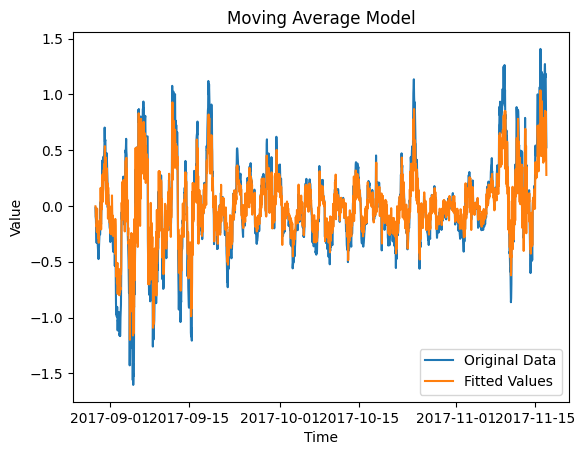

                               SARIMAX Results                                
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 494.095
Date:                Tue, 04 Jul 2023   AIC                           -980.190
Time:                        09:16:43   BIC                           -957.971
Sample:                    08-29-2017   HQIC                          -972.012
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0032      0.012     -0.271      0.786      -0.026       0.020
ma.L1          1.1650      0.013     87.333      0.000       1.139       1.191
ma.L2          0.6119      0.014     43.043      0.0

In [57]:
# Define the order of the MA model
order = (0, 0, 2)  # (p, d, q) order of the model

# Create the ARIMA model with the specified order
model = ARIMA(df['IOT_Sensor_Reading'], order=order)

# Fit the model to the data
model_fit = model.fit()

# Get the fitted values from the model
fitted_values = model_fit.fittedvalues

# Calculate the Root Mean Squared Error (RMSE) between the original data and fitted values
rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'], fitted_values))
print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title('Moving Average Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print the model summary
print(model_fit.summary())


RMSE: 0.13766230330797888


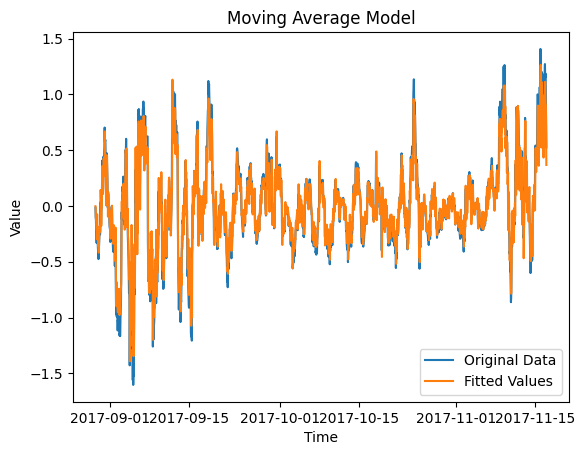

                               SARIMAX Results                                
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                 ARIMA(0, 0, 5)   Log Likelihood                1076.298
Date:                Tue, 04 Jul 2023   AIC                          -2138.595
Time:                        09:16:45   BIC                          -2099.711
Sample:                    08-29-2017   HQIC                         -2124.285
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.017     -0.177      0.860      -0.036       0.030
ma.L1          1.1919      0.015     77.833      0.000       1.162       1.222
ma.L2          1.1517      0.023     50.037      0.0

In [58]:
# Define the order of the MA model
order = (0, 0, 5)  # (p, d, q) order of the model

# Create the ARIMA model with the specified order
model = ARIMA(df['IOT_Sensor_Reading'], order=order)

# Fit the model to the data
model_fit = model.fit()

# Get the fitted values from the model
fitted_values = model_fit.fittedvalues

# Calculate the Root Mean Squared Error (RMSE) between the original data and fitted values
rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'], fitted_values))
print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt legend()
plt.title('Moving Average Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print the model summary
print(model_fit.summary())


---

### **Autoregressive Model (AR)**

Autoregressive (AR) models are a type of time series model that captures how a variable depends on its own past values. In an autoregressive model, the value at a specific time is linearly related to its past values.

**Mathematically, an AR model of order p, denoted as AR(p), is expressed as:**

Y(t) = c + φ1 * Y(t-1) + φ2 * Y(t-2) + ... + φp * Y(t-p) + ε(t)

- **Y(t)** represents the value of the variable at time t.
- **c** is a constant term.
- **φ1, φ2, ..., φp** are the autoregressive coefficients that show the impact of each past value on the current value.
- **Y(t-1), Y(t-2), ..., Y(t-p)** are the past values of the variable.
- **ε(t)** is the error term at time t, capturing unexplained variations.

The autoregressive coefficients (φ1, φ2, ..., φp) indicate how far back in time the model looks. A higher order (p) means it considers more past values, indicating a longer memory. The constant term (c) represents the intercept or mean of the process.

To estimate AR model parameters, methods like least squares or maximum likelihood estimation are used. These techniques minimize the sum of squared errors between predicted and actual values.

Determining the order (p) is crucial. It decides how many past values are included in the model. Order selection methods include visual inspection of autocorrelation and partial autocorrelation plots, information criteria (e.g., AIC, BIC), or statistical tests (e.g., Ljung-Box test).

Once parameters are estimated, AR models are handy for forecasting. They predict future values based on past ones. Forecasts are created by applying the autoregressive equation iteratively.

---



### **First-Order Autoregressive (AR) Model**

In this example, we'll create and analyze a first-order AR model, also known as an AR(1) model. This model considers only one lag for the autoregressive component, meaning it depends on the previous time step.

Here are the steps to create and analyze the AR(1) model using Python and the `statsmodels` library:

1. **Model Creation:**
   - We use the `AutoReg` class from the `statsmodels.tsa.ar_model` module to create the AR model.
   - Set the `lags` parameter to 1, indicating that we are considering only one lag for the autoregressive component.

2. **Model Fitting:**
   - Next, we fit the model to the data using the `fit()` method of the AutoReg model. This process estimates the model parameters.

3. **Fitted Values:**
   - We obtain the fitted values of the model using `model_fit.fittedvalues`. These values represent the predictions based on the AR model.

4. **Visualization:**
   - To visualize the original data and the fitted values, we plot them using `plt.plot()` or any suitable plotting library.

5. **Model Summary:**
   - Finally, we print the summary of the model using `model_fit.summary()`. This summary provides information about the model coefficients, standard errors, and other diagnostic statistics.

It's important to ensure that the data satisfies the assumptions of the AR model, including stationarity and independence of residuals. Additionally, appropriate lag order selection should be considered, possibly based on autocorrelation and partial autocorrelation analysis.

The AR(1) model is just one example of autoregressive models, and the order can be adjusted to capture different levels of dependence on past values.

---


RMSE: 0.01680753814597299


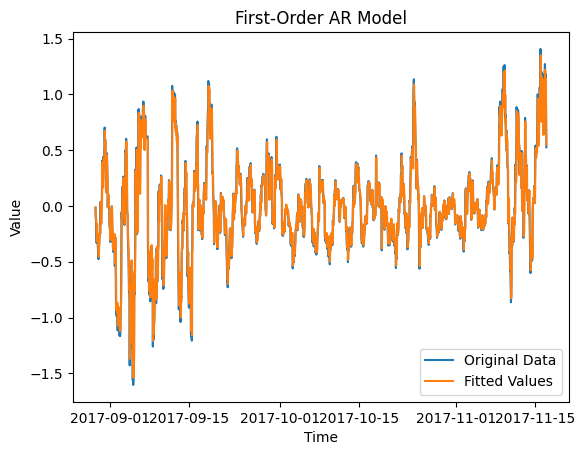

                            AutoReg Model Results                             
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                     AutoReg(1)   Log Likelihood                1376.143
Method:               Conditional MLE   S.D. of innovations              0.118
Date:                Tue, 04 Jul 2023   AIC                             -4.276
Time:                        09:16:45   BIC                             -4.268
Sample:                    08-29-2017   HQIC                            -4.273
                         - 11-17-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0001      0.003      0.049      0.961      -0.005       0.005
IOT_Sensor_Reading.L1     0.9596      0.006    148.238      0.000       0.947       0.972
        

In [59]:
# Define the order of the AR model
order = 1  # Order of the AR model

# Create the AutoReg model with the specified lag order
model = AutoReg(df['IOT_Sensor_Reading'], lags=order)

# Fit the model to the data
model_fit = model.fit()

# Get the fitted values from the model
fitted_values = model_fit.fittedvalues

# Calculate the Root Mean Squared Error (RMSE) between the original data and fitted values
rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'][:-1], fitted_values))
print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title('First-Order AR Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print the model summary
print(model_fit.summary())


---

### **Second-Order or General Autoregressive (AR) Model**

In this example, we'll create and analyze a second-order AR model, also known as an AR(2) model. This model considers two lags for the autoregressive component, which means it depends on the previous two time steps.

Here are the steps to create and analyze the AR(2) model using Python and the `statsmodels` library:

1. **Specify the Order:**
   - We specify the order of the AR model by setting the `order` variable to 2, indicating that we want to consider two lags in the autoregressive component.

2. **Model Creation:**
   - Create an AR model using the `AutoReg` class from the `statsmodels.tsa.ar_model` module.
   - Set the `lags` parameter to `[1, 2]` to specify the lags to include in the model.

3. **Model Fitting:**
   - Fit the model to the data using the `fit()` method of the AutoReg model. This process estimates the model parameters.

4. **Fitted Values:**
   - Obtain the fitted values of the model using `model_fit.fittedvalues`. These values represent the predictions based on the AR model.

5. **Visualization:**
   - To visualize the original data and the fitted values, plot them using `plt.plot()` or any suitable plotting library.

6. **Model Summary:**
   - Finally, print the summary of the model using `model_fit.summary()`. This summary provides information about the model coefficients, standard errors, and other diagnostic statistics.

You can adjust the `order` variable and the `lags` parameter according to your specific AR model requirements, considering the appropriate number of lags to include. The AR(2) model is just one example, and you can generalize it to higher-order AR models by extending the lags accordingly.

---



RMSE: 0.12812892138395462


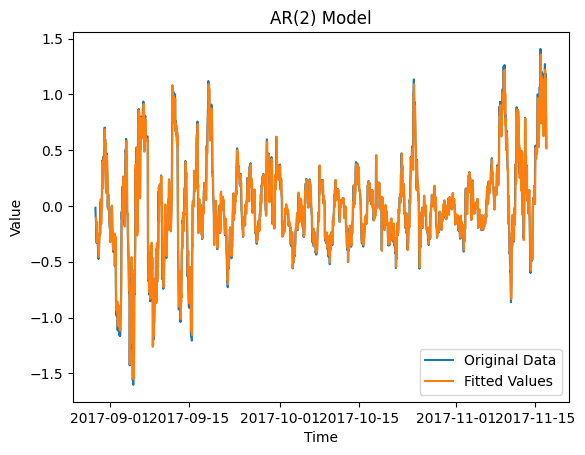

                            AutoReg Model Results                             
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                     AutoReg(2)   Log Likelihood                1382.786
Method:               Conditional MLE   S.D. of innovations              0.117
Date:                Tue, 04 Jul 2023   AIC                             -4.283
Time:                        09:16:46   BIC                             -4.272
Sample:                    08-29-2017   HQIC                            -4.279
                         - 11-17-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0001      0.003      0.051      0.960      -0.005       0.005
IOT_Sensor_Reading.L1     1.0450      0.023     45.834      0.000       1.000       1.090
IOT_Sens

In [60]:
# Specify the order of the AR model
order = 2  # Order of the AR model

# Create the AR model with lag orders 1 and 2
model = AutoReg(df['IOT_Sensor_Reading'], lags=[1, 2])

# Fit the model to the data
model_fit = model.fit()

# Get the fitted values from the model
fitted_values = model_fit.fittedvalues

# Calculate the Root Mean Squared Error (RMSE) between the original data and fitted values
rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'][:-2], fitted_values))
print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title(f'AR({order}) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print the model summary
print(model_fit.summary())


RMSE: 0.17536609915403986


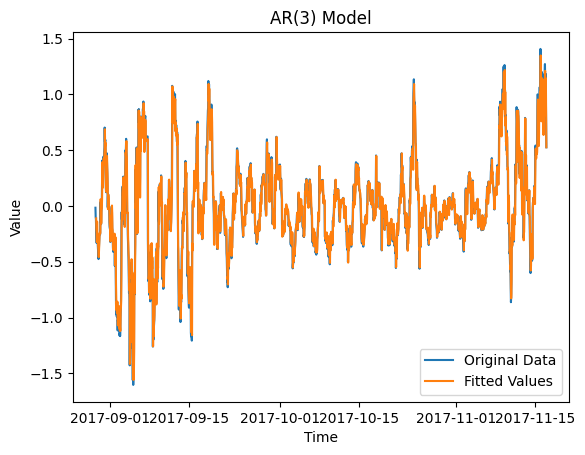

                            AutoReg Model Results                             
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                     AutoReg(3)   Log Likelihood                1383.045
Method:               Conditional MLE   S.D. of innovations              0.117
Date:                Tue, 04 Jul 2023   AIC                             -4.283
Time:                        09:16:46   BIC                             -4.269
Sample:                    08-29-2017   HQIC                            -4.278
                         - 11-17-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0002      0.003      0.063      0.950      -0.005       0.005
IOT_Sensor_Reading.L1     1.0485      0.023     45.821      0.000       1.004       1.093
IOT_Sens

In [61]:
# Specify the order of the AR model
order = 3  # Order of the AR model

# Create the AR model with lag orders 1, 2, and 3
model = AutoReg(df['IOT_Sensor_Reading'], lags=[1, 2, 3])

# Fit the model to the data
model_fit = model.fit()

# Get the fitted values from the model
fitted_values = model_fit.fittedvalues

# Calculate the Root Mean Squared Error (RMSE) between the original data and fitted values
rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'][:-3], fitted_values))
print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title(f'AR({order}) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print the model summary
print(model_fit.summary())


RMSE: 0.21255342211341122


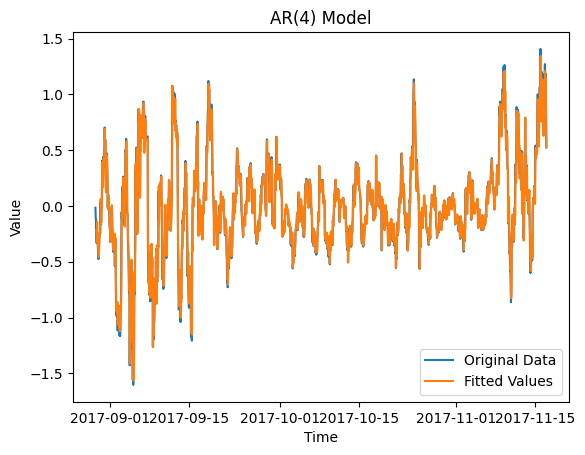

                            AutoReg Model Results                             
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                     AutoReg(4)   Log Likelihood                1383.678
Method:               Conditional MLE   S.D. of innovations              0.117
Date:                Tue, 04 Jul 2023   AIC                             -4.283
Time:                        09:16:46   BIC                             -4.266
Sample:                    08-29-2017   HQIC                            -4.277
                         - 11-17-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0002      0.003      0.071      0.943      -0.005       0.005
IOT_Sensor_Reading.L1     1.0499      0.023     45.883      0.000       1.005       1.095
IOT_Sens

In [62]:
# Specify the order of the AR model
order = 4  # Order of the AR model

# Create the AR model with lag orders 1, 2, 3, and 4
model = AutoReg(df['IOT_Sensor_Reading'], lags=[1, 2, 3, 4])

# Fit the model to the data
model_fit = model.fit()

# Get the fitted values from the model
fitted_values = model_fit.fittedvalues

# Calculate the Root Mean Squared Error (RMSE) between the original data and fitted values
rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'][:-4], fitted_values))
print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title(f'AR({order}) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print the model summary
print(model_fit.summary())


---

### **Conclusion**

In this project, our primary objective was to predict IoT sensor readings using one year's worth of time series data. We followed a systematic approach to build and evaluate time series models to achieve this goal.

The key steps of our project included:

1. **Data Preprocessing**: We started by reading and preprocessing the data to ensure it was in a suitable format for analysis. Data quality and consistency were crucial for reliable model building.

2. **Exploratory Data Analysis (EDA)**: We conducted EDA to gain insights into the data, uncovering patterns, trends, and seasonality. This exploration helped us better understand the underlying structure of the time series.

3. **Stationarity Check**: We checked the stationarity of the time series data. Since the data was already stationary, we did not need to perform any differencing or transformation.

4. **Modeling**: We analyzed autocorrelation and partial autocorrelation plots (ACF and PACF) to determine the appropriate order for autoregressive (AR) and moving average (MA) components in our models. These plots provided insights into the lagged dependencies within the data.

5. **Model Building**: We constructed several models, including moving average (MA) models and autoregressive (AR) models with different orders. We evaluated their performance using both the p-value and root mean squared error (RMSE).

6. **Model Evaluation**: After assessing the models, we found that the AR models outperformed the MA model in terms of predictive accuracy. Specifically, the first-order AR model (AR(1)) demonstrated the best performance, showcasing lower p-values and RMSE compared to higher-order AR models. This suggests that a simple AR(1) model was sufficient to capture the essential patterns in the data.

In summary, our project successfully employed time series analysis to predict IoT sensor readings. The insights gained and models developed in this project can serve as a foundation for future work in time series forecasting and predictive analytics.

---


### **Common Questions and Answers**

1. **What is time series analysis and why is it important?**

   Time series analysis is the study of data collected or recorded over time, where each data point is associated with a specific time or date. It is essential for understanding and forecasting trends, patterns, and dependencies in time-dependent data. Time series analysis finds applications in various fields, such as finance, economics, weather forecasting, and stock market predictions.

2. **How do you determine if a time series is stationary or non-stationary?**

   Stationarity in a time series means that its statistical properties, like mean and variance, do not change over time. To determine stationarity, one can visually inspect the data for trends or seasonality. Additionally, statistical tests like the Augmented Dickey-Fuller (ADF) test can assess stationarity by comparing the data's properties at different time points.

3. **Explain the concept of autocorrelation and its significance in time series analysis.**

   Autocorrelation measures the correlation between a data point and its past values at different lags. It indicates how a time series depends on its previous values. Significance lies in identifying patterns and dependencies within the data, which is crucial for modeling and forecasting.

4. **What are ACF and PACF plots? How do you interpret them?**

   ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots show the correlation between a data point and its past values. In ACF, each bar represents the correlation at a specific lag. PACF, however, focuses on the direct relationship after removing intervening observations. Interpretation involves identifying significant correlations at lags, which help determine the order of autoregressive and moving average components in time series models.

5. **What is the difference between an autoregressive (AR) model and a moving average (MA) model?**

   An AR model captures a variable's relationship with its past values, while an MA model models the influence of past forecast errors. AR models use lagged values of the variable, while MA models use lagged errors. A combination of AR and MA components results in the ARMA model, which extends the capabilities of both.

6. **How do you select the order of an AR or MA model?**

   The order of AR or MA models can be chosen by analyzing ACF and PACF plots. A significant correlation at a particular lag in ACF indicates the order of the MA component, and a significant spike in PACF at a lag indicates the order of the AR component. Model selection may also involve statistical tests and information criteria.

7. **Explain the concept of white noise in the context of time series analysis.**

   White noise refers to a random sequence of data points with a constant mean and variance. In time series analysis, it serves as a reference or benchmark against which more complex models are compared. It is used in model diagnostics, simulating data, and parameter estimation.

8. **What is the purpose of the Augmented Dickey-Fuller (ADF) test in time series analysis?**

   The ADF test assesses whether a time series is stationary or non-stationary by comparing the data's statistical properties at different time points. It is a common tool to determine the presence of unit roots in time series data, which indicate non-stationarity.

9. **Describe the steps involved in building a time series model.**

   The steps in building a time series model typically include data preprocessing, exploratory data analysis (EDA), stationarity check, order selection for AR and MA components, model building, model evaluation, and forecasting. The specific procedures may vary depending on the data and modeling technique.

10. **How do you evaluate the performance of a time series model?**

    Model evaluation involves assessing its predictive accuracy. Common methods include calculating metrics like root mean squared error (RMSE) and comparing the p-values of model coefficients. Additionally, visual inspection of model forecasts compared to actual data is essential.

11. **What is the significance of the p-value in time series modeling?**

    The p-value assesses the significance of model coefficients. It helps determine if a variable's contribution to the model is statistically significant. Low p-values indicate a strong relationship between the variable and the response, while high p-values suggest insignificance.

12. **What are some common challenges or issues faced when working with time series data?**

    Common challenges in time series analysis include dealing with non-stationarity, seasonality, missing values, and outliers. Choosing appropriate model orders and handling overfitting are also important considerations.

13. **Can you explain the concept of seasonality in time series analysis?**

    Seasonality refers to recurring patterns or fluctuations in time series data that follow a regular time interval, such as daily, weekly, or yearly cycles. These patterns are often linked to external factors and can influence the data's behavior.

14. **How can you handle missing values or outliers in time series data?**

    Handling missing values may involve imputation techniques or removing incomplete data points. Outliers can be addressed using robust modeling techniques, data transformation, or by identifying the underlying causes of outliers.

15. **What are some potential applications of time series analysis in real-world scenarios?**

    Time series analysis finds applications in various fields, such as finance for stock price predictions, in economics to analyze economic trends, in weather forecasting, and in healthcare for disease outbreak predictions. It is also used in business for sales forecasting and in manufacturing for quality control.

---